In [1]:
import numpy as np
import pandas as pd
import re
import scipy as sp
import xarray as xr
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#读取文件
df1=pd.read_csv('global.csv')

In [3]:
df2=pd.read_csv('co2_annmean_mlo.csv')
df2=df2.loc[(df2['year'] >1985)&(df2['year'] <2005)][['year','mean']]

### 1.1 [15 points] Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004

In [4]:
def gama(t):
    gama=float(df1.loc[df1['Year"']==int(t)]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return gama
def NBEM(f,t,k12,k21):
    N1,N2=f
    dfdt=[-k12*N1+k21*N2+gama(t),k12*N1-k21*N2]
    return dfdt
k12=105/740
k21=102/900
#Initial condition
f0=[740/2.13,900/2.13]
t=np.linspace(1986,2004,19)
f=integrate.odeint(NBEM,f0,t,args=(k12,k21))
N1_NBmodel=f[:,0]

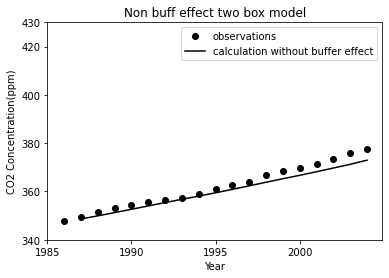

In [5]:
plt.plot(df2['year'],df2['mean'],'ok',label='observations')
plt.plot(t[1:19],N1_NBmodel[1:19],'k',label='calculation without buffer effect')
plt.title('Non buff effect two box model')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend()
plt.show()

### 1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.

In [6]:
def gama(t):
    gama=float(df1.loc[df1['Year"']==int(t)]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return gama
def zeta(N1):
    zeta=3.69+1.86/100*N1-1.8*(1e-6)*N1*N1
    return(N20)
def WBEM(f,t,k12,k21,N20):
    N1,N2=f
    dfdt=[-k12*N1+k21*(N20+zeta(N1)*(N2-N20))+gama(t),k12*N1-k21*(N20+zeta(N1)*(N2-N20))]
    return dfdt
N20=821/2.13
k12=105/740
k21=102/900
#Initial condition
f0=[740/2.13,900/2.13]
t=np.linspace(1986,2004,19)
f=integrate.odeint(WBEM,f0,t,args=(k12,k21,N20))
N1_WBmodel=f[:,0]

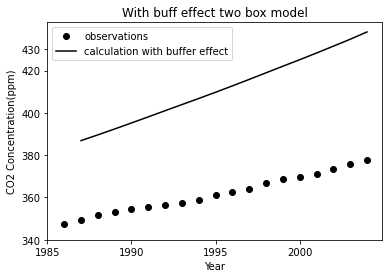

In [7]:
plt.plot(df2['year'],df2['mean'],'ok',label='observations')
plt.plot(t[1:19],N1_WBmodel[1:19],'k',label='calculation with buffer effect')
plt.title('With buff effect two box model')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend()
plt.show()

### 1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

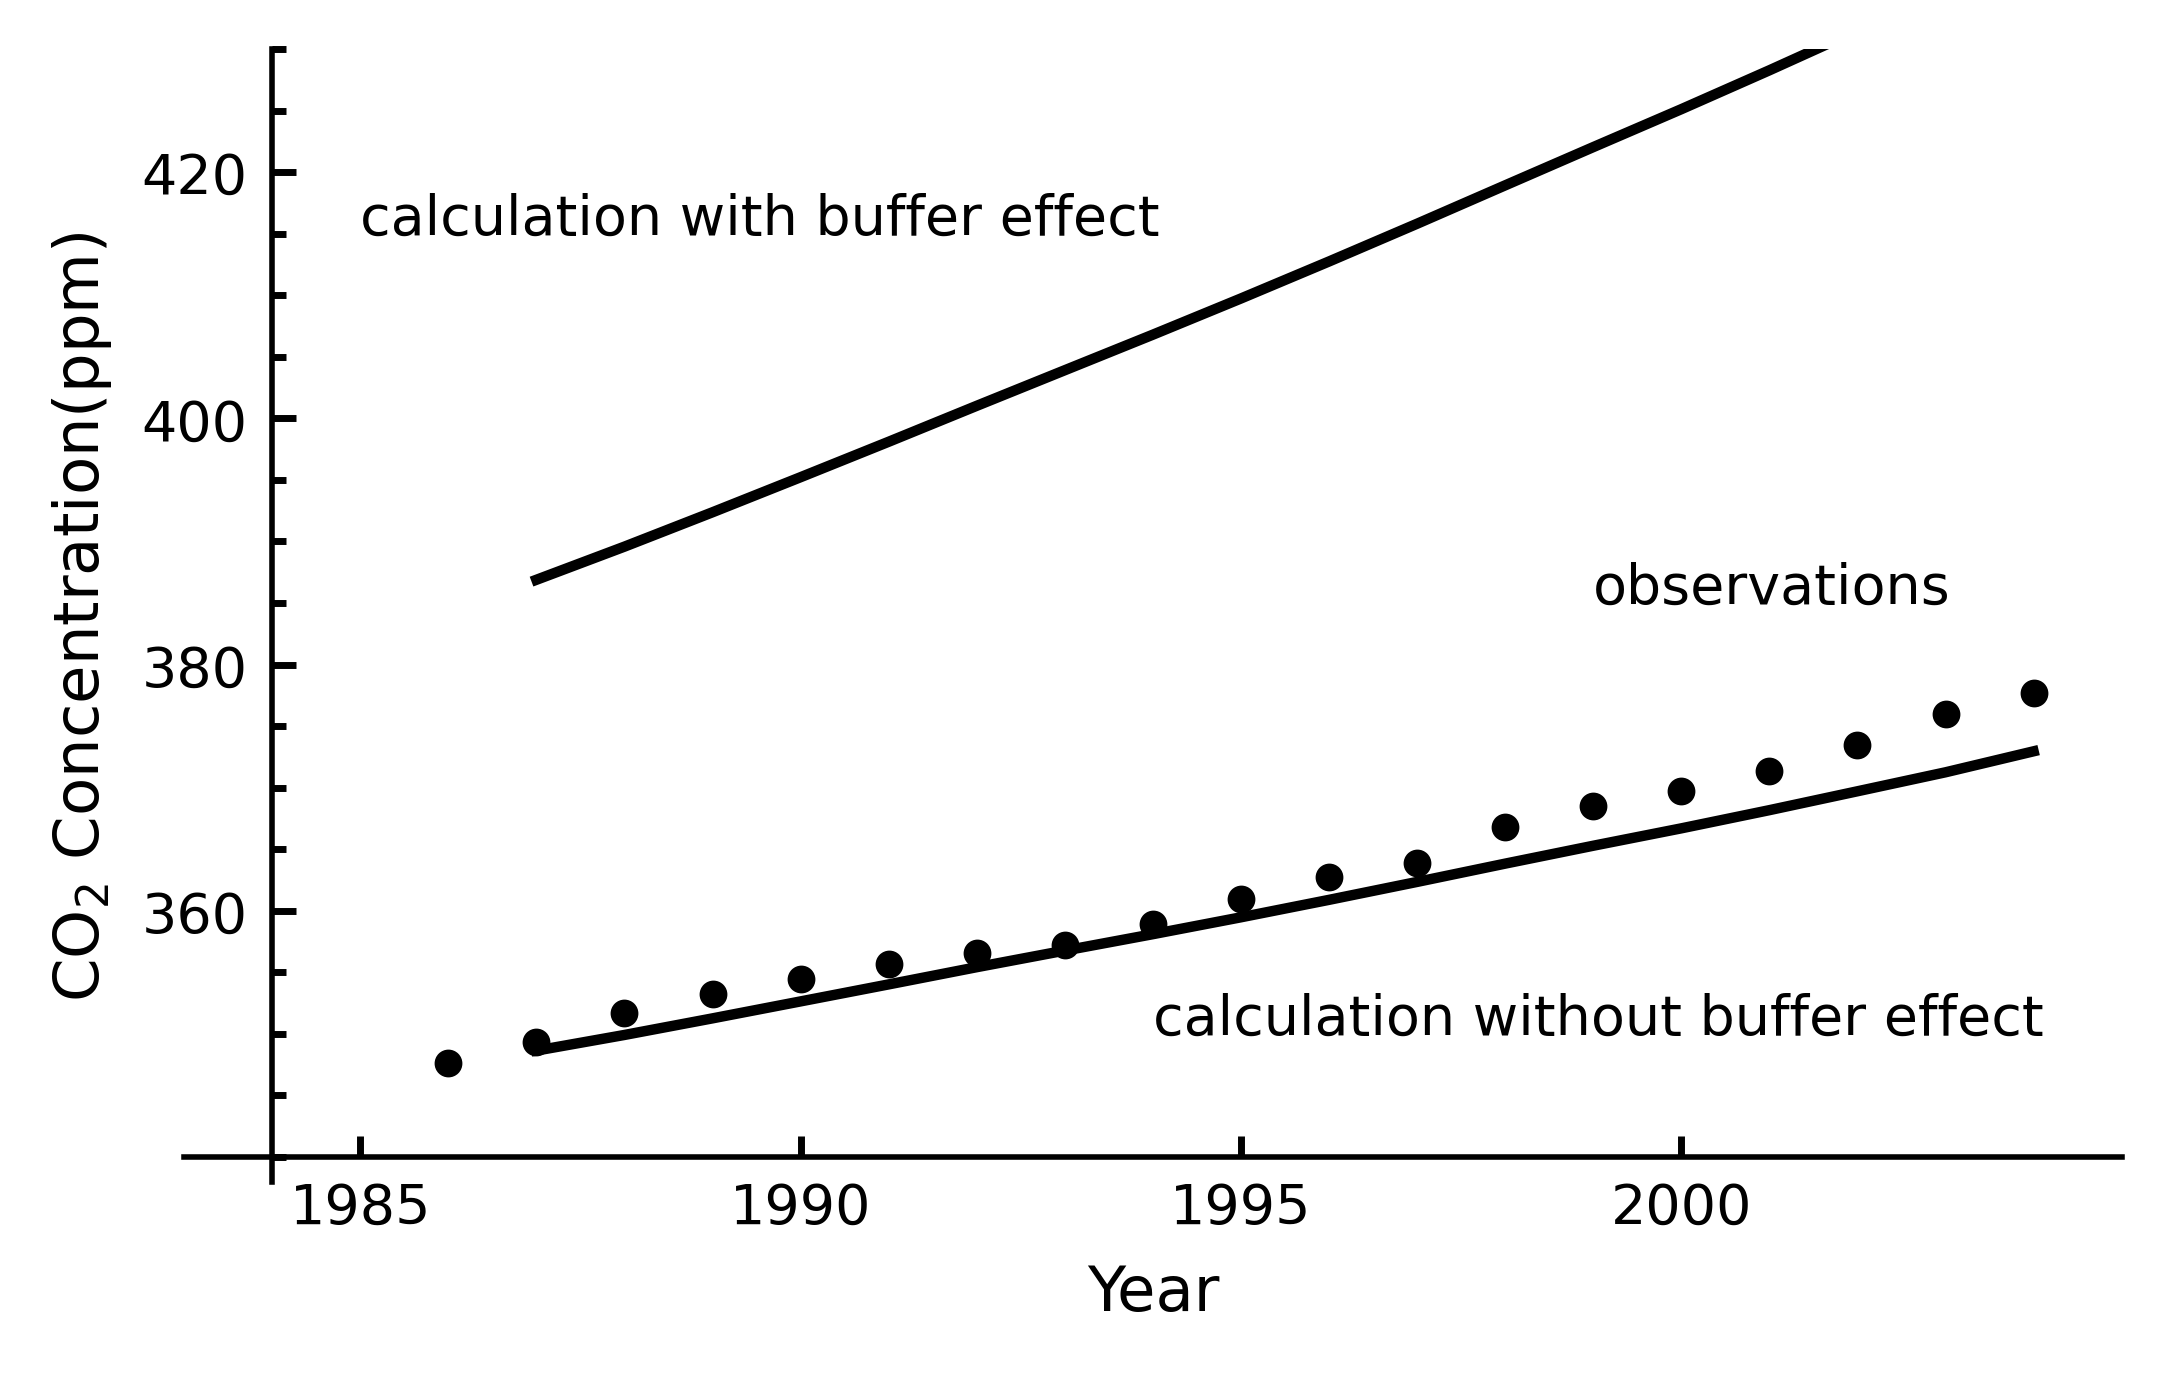

In [8]:
#set figure
fig=plt.figure(figsize=(5,3),dpi=500)
ax=fig.add_subplot(1, 1, 1)
#plot data
plt.plot(df2['year'],df2['mean'],'ok',markersize=3)
plt.plot(t[1:19],N1_NBmodel[1:19],'k')
plt.plot(t[1:19],N1_WBmodel[1:19],'k')
#xticks/yticks
plt.xticks([1985,1990,1995,2000])
plt.yticks([360,380,400,420])
#xlim/ylim
plt.xlim(1983,2005)
plt.ylim(338,430)
#xlable/ylable
plt.xlabel('Year',fontsize=9)
plt.ylabel('CO$_{2}$ Concentration(ppm)',fontsize=9)
ax.tick_params(labelsize=8)
#set border
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#set axis format
ax.minorticks_on()
ax.tick_params(axis='y',which='major',direction='in',width=1,length=3.5)
ax.tick_params(axis='y',which='minor',direction='in',width=1,length=2)
ax.tick_params(axis='x',which='major',direction='in',width=1,length=3)
ax.tick_params(axis='x',which='minor',direction='in',width=1,length=3.5,color='none')
ax.spines['bottom'].set_position(('data',340))
ax.spines['left'].set_position(('data',1984))
#add text
ax.text(1985,415,'calculation with buffer effect',fontsize=8)
ax.text(1994,350,'calculation without buffer effect',fontsize=8)
ax.text(1999,385,'observations',fontsize=8)
plt.show()